In [ ]:
!git clone https://github.com/Yaswanth-B/AccessibleLLM.git

In [ ]:
!pip install git+https://github.com/huggingface/transformers.git
!pip install bert-score torch transformers

In [10]:
import zipfile
import os

# Path to the uploaded zip file
zip_path = '/content/AccessibleLLM/object detection/pictureDS.zip'

# Directory to extract to
extract_path = '/content/AccessibleLLM/object detection/picturedataset'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

os.listdir(extract_path)

['pictureDS']

In [6]:
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding

In [7]:
import requests #Allows you to send HTTP requests easily in Python.
import numpy as np
import PIL # PIL (or its fork Pillow) is used for opening, manipulating, and saving many different image file formats in Python.
import io
import html
import time
from base64 import b64decode, b64encode
from IPython.display import display, Javascript, Image
from google.colab.output import eval_js
import cv2
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import bert_score

Enter the image number (1-50): 46


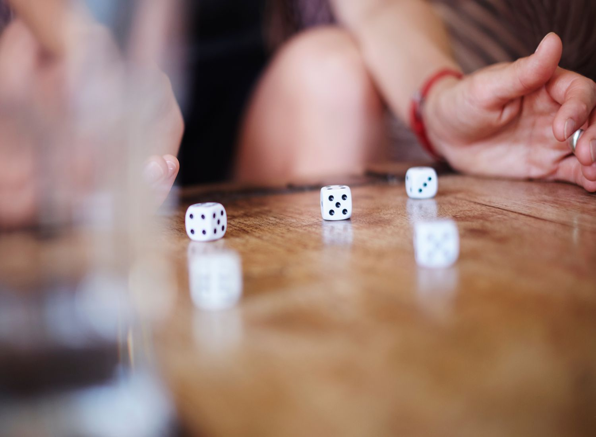

In [19]:
import os
from PIL import Image

image_number = int(input("Enter the image number (1-50): "))

if 1 <= image_number <= 50:

    image_path = f"/content/AccessibleLLM/object detection/picturedataset/pictureDS/{image_number}.jpg"

    if os.path.exists(image_path):

        image = Image.open(image_path).convert('RGB')

        image = image.resize((596, 437))

        display(image)
    else:
        print("Image file not found.")
else:
    print("Invalid image number. Please enter a number between 1 and 50.")


In [15]:
from transformers import AutoProcessor, Blip2ForConditionalGeneration
import torch

processor = AutoProcessor.from_pretrained("Salesforce/blip2-opt-2.7b")
model = Blip2ForConditionalGeneration.from_pretrained("Salesforce/blip2-opt-2.7b", torch_dtype=torch.float16)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/432 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.11M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/548 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/6.96k [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/127k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/10.0G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/5.50G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model.to(device)

In [21]:
inputs = processor(image, return_tensors="pt").to(device, torch.float32)  # Specify float32 explicitly

generated_ids = model.generate(**inputs, max_length=50, min_length=20)
generated_text = processor.batch_decode(generated_ids, skip_special_tokens=True)[0].strip()
print(generated_text)

a person playing dice on a wooden table with a glass of water in the background stock photo - 180589800


In [22]:
import torch
from transformers import BertTokenizer, BertForSequenceClassification
import bert_score

# Sample captions generated by BLIP-2 Model
captions_Blip = generated_text.strip().split('\n')
print(captions_Blip)


# Ask the user for the line number
line_number = int(input("which picture did you select? (starting from 1): "))

# Read text from the file
with open("/content/AccessibleLLM/object detection/truetext.txt", "r") as file:
    lines = file.readlines()

# Check if the line number provided by the user is within the range of lines in the file
if 1 <= line_number <= len(lines):
    # Select the line based on the line number provided by the user
    selected_line = lines[line_number - 1].strip()
    references = [selected_line]  # Store the selected line in the references list
    print(references)


# Compute BERT Score for BLIP-2
P_A, R_A, F1_A = bert_score.score(
    captions_Blip,
    references,
    lang='en',
    model_type='bert-base-uncased',  # BERT model type
    # verbose=True  # Print progress
)


# Print results for BLIP-2 model
print("BERTScore for BLIP-2 Model:")
print(f"Precision: {P_A.mean():.4f}")
print(f"Recall: {R_A.mean():.4f}")
print(f"F1-score: {F1_A.mean():.4f}")



['a person playing dice on a wooden table with a glass of water in the background stock photo - 180589800']
which picture did you select? (starting from 1): 46
['a person playing dice on a table']
BERTScore for BLIP-2 Model:
Precision: 0.5051
Recall: 0.8693
F1-score: 0.6390
